In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

import typing
import keras

In [2]:

def plot_multiple_histories(histories : typing.Dict, metric='loss'):
  """
  Plots the training history of multiple models on the same plot for comparison.
  
  Parameters:
    histories: List of History objects from multiple model's fit() calls.
    metric: The metric to plot ('loss', 'accuracy', etc.).
    labels: List of labels for the models. If None, defaults to 'Model 1', 'Model 2', etc.
  """
  # Check if labels are provided, otherwise generate default labels
  # if labels is None:
  #   labels = [f'Model {i+1}' for i in range(len(histories))]
  
  # Initialize the plot
  plt.figure(figsize=(10, 6))
  
  # Loop through each history and plot the metrics
  for i, (label, history) in enumerate(histories.items()):
    epochs = range(1, len(history.history[metric]) + 1)
    
    # Plot training metric
    plt.plot(epochs, history.history[metric], label=f'{label} {metric.capitalize()}')
    
    # Plot validation metric if available
    # if f'val_{metric}' in history.history:
    #   plt.plot(epochs, history.history[f'val_{metric}'], '--', label=f'{label} Validation {metric.capitalize()}')
  
  # Add labels and title
  plt.title(f'Comparison of {metric.capitalize()} Between Models')
  plt.xlabel('Epochs')
  plt.ylabel(metric.capitalize())
  plt.legend()
  
  # Show plot
  plt.show()



In [3]:

import sklearn.model_selection
from sklearn.datasets import make_regression

X,y = make_regression(
  n_samples=5000,
  n_features=4,
  n_informative=3,
  noise=2
)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
  X,
  y,
  test_size=0.33,
  random_state=42
)

In [6]:

def train_model_activation(activation_function) -> keras.callbacks.History:

  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(shape=(4,)))
  model.add(keras.layers.Dense(1, activation=activation_function))
  
  opt = keras.optimizers.SGD(learning_rate=0.001)
  model.compile(optimizer=opt, loss='mse', metrics=['mae'])
  history = model.fit(
    X_train, 
    y_train,
    batch_size=32, 
    epochs=40, 
    validation_split=0.3,
    verbose=0
  )

  return history



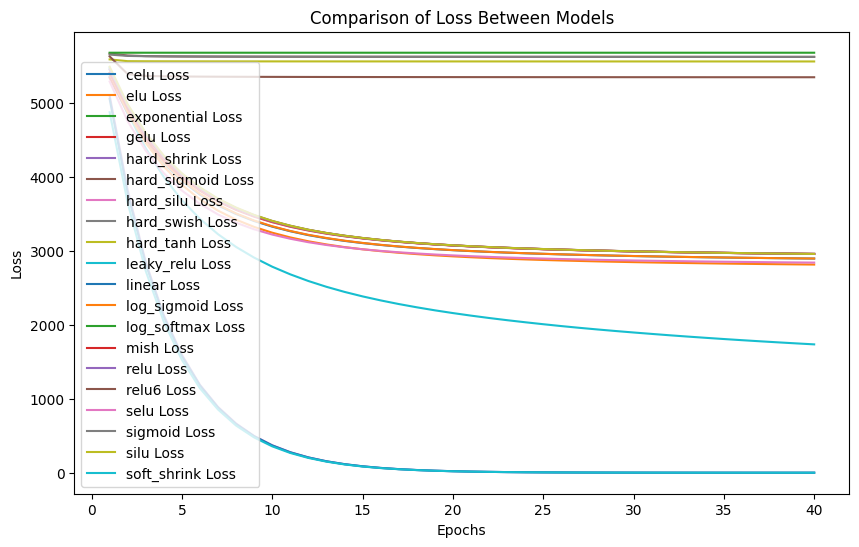

In [8]:

valid_acts = [
    fn for fn in dir(keras.activations)
    if callable(getattr(keras.activations, fn))
    and not fn.startswith(('deserialize', 'serialize', 'get'))
    and fn not in {'glu'}  # exclude shape-constrained activations
]


plot_multiple_histories(
  histories={
    f"{f}" : train_model_activation(f)
    for f in valid_acts[:20]
  }
)